In [109]:
import numpy as np
from numpy import linalg as LA
import scipy

In [110]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)


In [111]:
def hassian(gradient2d_f,values):
    hassian = []
    for gradient_f in gradient2d_f:
        grad = gradient(gradient_f,values)
        hassian.append(grad)
    return np.array(hassian)

In [112]:
def gradient_direction(gradient_f,gradient2d_f,values,newton_direction=False):
    dk = []
    grad = gradient(gradient_f,values)
    if newton_direction:
        dk = - np.dot(LA.inv(hassian(gradient2d_f,values)), grad)
        if LA.norm(grad)/LA.norm(dk) < 0.01:
            dk = - grad
    else:
        dk = - grad
    return dk
        

In [113]:
f = lambda x,y: (x-2)**4 + (x-2*y)**2
dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
dfy = lambda x,y: -4*(x-2*y)

dfx11 = lambda x,y: 12*(x-2)**2+2
dfx12 = lambda x,y: -4

dfx21 = lambda x,y: -4
dfx22 = lambda x,y: 8


In [114]:
hassian(np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([1,2]))

array([[14, -4],
       [-4,  8]])

In [115]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    p =  - (LA.norm(grad))**2
    return p

In [116]:
gradient_direction(np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([1,2]),newton_direction=True)

array([ 0.33333333, -1.33333333])

In [117]:
def armijo_step_algorithm(f,gradient2,negative_grad,values,delta):
    ro = 1
    eta = 2
    descent = descent_direction(gradient2,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+ro*negative_grad)) > f(*values)+ro*delta*descent:
        ro /= 2
    return ro

In [118]:
# f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
# dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
# dfy = lambda x,y: 200*(y-x*x)

f = lambda x,y: (x-2)**4 + (x-2*y)**2
dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
dfy = lambda x,y: -4*(x-2*y)

negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

1.3877787807814457e-17


In [119]:
print(dfx(1,1))
print(dfy(1,1))

-6
4


In [120]:
from numpy import linalg as LA
def general_descent(accuracy,function,gradient_f,gradient2d_f,initial,use_newton=True):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-3)
    while counter <=1000:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = gradient_direction(gradient_f,gradient2d_f,xk,newton_direction=use_newton)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient(gradient_f,xk))<=0.0001:
            break
    return xk1

In [121]:
general_descent(10,f,np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([0,10]),use_newton=True)

107.62899237658968
xk1 at iterate: 0--->: [0.66666667 0.33333333]
dk at iterate: 0--->: [ 0.66666667 -9.66666667]
step_size at iterate: 0--->: 1.0
9.481481481481474
xk1 at iterate: 1--->: [2.44444444 1.22222222]
dk at iterate: 1--->: [0.44444444 0.22222222]
step_size at iterate: 1--->: 4.0
0.3511659807955937
xk1 at iterate: 2--->: [1.85185185 0.92592593]
dk at iterate: 2--->: [-0.14814815 -0.07407407]
step_size at iterate: 2--->: 4.0
0.013006147436829103
xk1 at iterate: 3--->: [2.04938272 1.02469136]
dk at iterate: 3--->: [0.04938272 0.02469136]
step_size at iterate: 3--->: 4.0
0.0004817091641927858
xk1 at iterate: 4--->: [1.98353909 0.99176955]
dk at iterate: 4--->: [-0.01646091 -0.00823045]
step_size at iterate: 4--->: 4.0


array([1.98353909, 0.99176955])

In [122]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [123]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

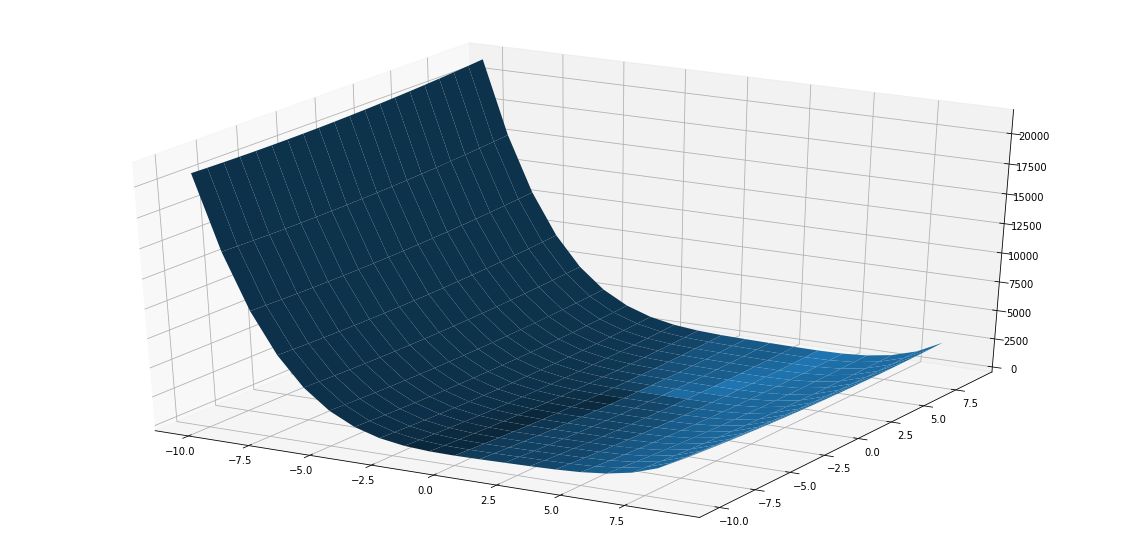

In [124]:
draw_function(x,y,f)